# Risk Sensitive SSP

### Stochastic Shortest Path (SSP)

The SSP problem is a tuple $\mathcal{M} = \langle S,A,P,C,s_0,G  \rangle$ in which $S$ is a finite set of states; $A$ is a finite set of actions, $A(s) \subseteq A$ is a set of actions applicable in state $s$; $P(s'|s,a)$ is the probability of taking action $a\in A(s)$ in state $s$ ending in state $s'$; $C(s,a)$ is the cost function that gives the immediate cost value for taking an action $a\in A(s)$ in state $s$; $s_0\in S$ is the initial state and $G$ is the set of goal states. Additionally, is common to  make two assumptions: 

- there exists at least one policy, $\forall s \in S$, that reaches the goal with probability 1, called proper policy and 
- all improper policies accumulate infinite expected cost.



### A Risk Sensitive SSP (RS-SSP)
An RS-SSP is an SSP with an optimization criterion that takes into account a risk factor $\lambda$ indicating if the agent is adverse, neutral or prone to risk. A solution for a RS-SSP is based on an exponential Value function, $\forall s \in S$ :

\begin{equation}
V(s) = \underset{a\in A(s)}{\min} \left\{ \sum_{s'\in S} e^{\lambda C(s,a)}P(s'|s,a)V(s') \right\}, \forall s \in S. 
\end{equation}

## Algorithms

### BinSearch algorithm



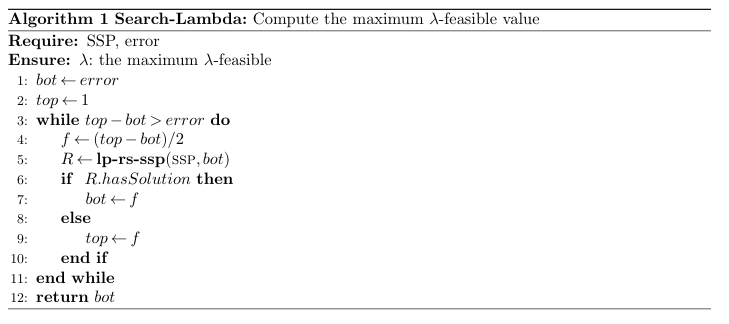

In [6]:
from IPython.display import Image 
Image(filename='alg01.png')

## RiskAdverse algorithm
<img src="alg02.png">

## Experiments

## Tire World Domain 

This is a standard domain for probabilistic planning, where a car can move to a different location through routes. The objective is to go from an initial location $s_0$ to a goal location $s_g$. In each movement, there is a probability of puncturing a tire, in this situation the car is moved to the initial location.

### Example

The following image ilustrate a triangle tire world domain with a policy where:

- The initial state is $s_0$ (&#128660;).
- The goal state is $s_g$ (&#9873;).
- There are 3 actions $down$ (&#11107;), $right$ (&#11106;) and $left$ (&#11113;).
- In red squares there is a probability of 0.5 of puncturing a tire (in this case the car return to $s_0$).
- In green square there is a probability of 0.8 of move (execute a desired action) and 0.2 of stay in the same location (fail to execute the desired action).
- Black arrows denote a desired action for each state (a policy).
- Gray arrows denote all the others available actions of some state.]
- Cost of an action is 1.
<img src="example-tire.png">

_"intuitively, the most risk adverse policy will be one that tries to avoid red squares, that is, always going to the edge of the stage as the previus figure show._"

In [1]:
from ssp import *
from vi import *
from lpSolver import *
from genProblem import *
from lpSolverG import *

### Running some test with Triangle Tire World

Lambda with risk adverse algorithm
lambda = 0.6832920548751436
--------------------------------------------


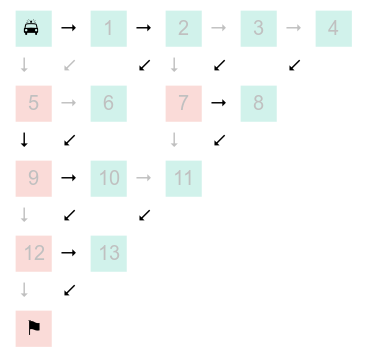

In [2]:
tam = 2
R = genTire(tam)
ssp = R['ssp']

md = R['metadata'] 
am = R['actMap']

error = 0.00001
beta  = error + 0.00000001
factor = 0.1


R = riskAdverse(ssp, beta, error, factor, initPolicy(ssp))
print('Lambda with risk adverse algorithm')
print('lambda = {0}'.format(R['factor']))
print('--------------------------------------------')
image_name = "test1"
F = lp_ssp_e(ssp, R['factor'])
plotTire(ssp, tam, image_name, F['policy'], md, am);
from IPython.display import Image 
Image(filename=image_name+'.png')




_The policy obtained with the $\lambda = 0.683$  is not the most adverse to the risk, in the state $s_2$ the car prefers to go to $s_6$ which is a ´safe state´, then the only possible action is to go towards $s_9$ which is likely to return to the beginning_

Lambda with bin search algorithm
lambda = 8.233472031249999
--------------------------------------------


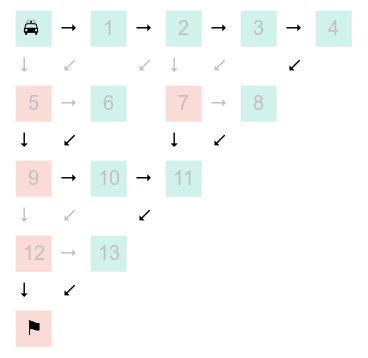

In [3]:
R = search_lambda2(ssp)
print('Lambda with bin search algorithm')
print('lambda = {0}'.format(R['factor']))
print('--------------------------------------------')
image_name = "test2"
F = lp_ssp_e(ssp, R['factor'])
plotTire(ssp, tam, image_name, F['policy'], md, am);

Image(filename=image_name + '.png')


_The policy obtained with the $\lambda = 8.23$ always try to go to a state which is going towards the goal without any chance of returning to the beginning_. _$s_7$ take action to go to $s_{11}$ instead $s_8$ that is safe but will take much cost; $s_{10}$ take action to go $s_11$ instead $s_{12}$ that we consider is a safe choice_

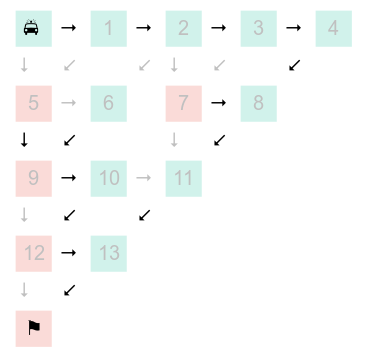

In [4]:
tam = 2
R = genTire(tam)
ssp = R['ssp']

md = R['metadata'] 
am = R['actMap']

R = lp_ssp_e(ssp, 0.684)
image_name = "tire3-07"
plotTire(ssp, tam, image_name, R['policy'], md, am);

from IPython.display import Image 
Image(filename = image_name+'.png')

_In this case, we tested with $\lambda = 0.684$, which possibly due to the given error of the riskAdverse algorithm could return us a slightly lower value than desired. The policy from $s_0$ is the same as the previous one, but for the intermediate states the behavior is different, the state $s_9$ seems to prefer to take some risk, instead of going through a safe route_

## Experiments with Triangle Tire World Instances

In [5]:
def expTir():
	# TireWorld Domain
	print('#{0:10} {1:10} {2:10} {3:10} {4:10} {5:10} {6:10} {7:10}'.format('instante','states','Atime','Alambda','Btime','Blambda','Ctime','Clambda'))

	for tam in range(2,22,2):
		R = genTire(tam)
		ssp = R['ssp']
		s_states = len(ssp._S)
		instance = str(tam)
		
		R1 = search_lambda2(ssp)

		factor = 0.1
        
		error = 0.001
		beta = error + 0.00000000000001
        
        
		R2 = riskAdverse(ssp, beta, error, factor, initPolicy(ssp))

		R3 = riskAdverse2(ssp, beta, error, factor, initPolicy(ssp))

		print('{0:10} {1:6} {2:10.3f} {3:10.3f} {4:10.3f} {5:10.3f} {6:10.3f} {7:10.3f}'.format(instance,s_states,R1['time'],R1['factor'],R2['time'],R2['factor'],R3['time'],R3['factor']))

expTir()

#instante   states     Atime      Alambda    Btime      Blambda    Ctime      Clambda   
2              15      0.107      8.233      0.013      0.682      0.070      0.692
4              45      0.373      5.468      0.059      0.692      0.225      0.692
6              91      0.882      5.206      0.145      0.692      0.986      0.692
8             153      1.577      3.805      0.321      0.692      1.997      0.692
10            231      2.803      2.892      0.634      0.692      3.917      0.692
12            325      4.871      2.787      1.035      0.692      7.346      0.692
14            435      7.995      2.504      1.729      0.692     18.674      0.692
16            561     14.112      2.329      2.435      0.692     22.282      0.692
18            703     19.473      2.192      4.087      0.692     35.534      0.692
20            861     27.427      2.070      4.803      0.692     51.366      0.692


#### Leyend
- A: Binary Search Algorithm using dual linear formulation
- B: Risk Adverse Algorithm using dual linear formulation
- C: Risk Adverse Algorithm using policy iteration